In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
column_headers = [
    "Frequency", "Angle of attack",
    " Chord length", " Free-stream velocity", "Suction side displacement thickness"," Scaled sound pressure level"
]
# we added the columns headers inorder to use it on our dataset without headers

In [4]:
airfoil = pd.read_csv('airfoil_self_noise.csv',names=column_headers)
airfoil
#read the csv file and then add the headers from the column_headers 

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [5]:
airfoil.isnull().sum() # get the sum of the null values in the data

Frequency                              0
Angle of attack                        0
 Chord length                          0
 Free-stream velocity                  0
Suction side displacement thickness    0
 Scaled sound pressure level           0
dtype: int64

In [6]:
airfoil.dtypes  #get the data type 

Frequency                                int64
Angle of attack                        float64
 Chord length                          float64
 Free-stream velocity                  float64
Suction side displacement thickness    float64
 Scaled sound pressure level           float64
dtype: object

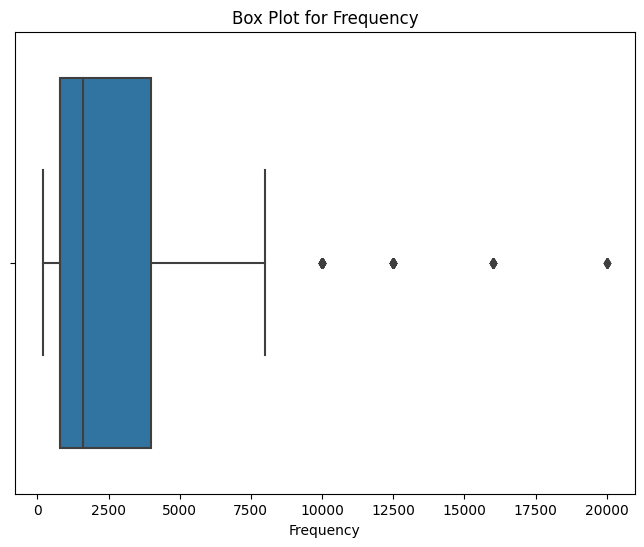

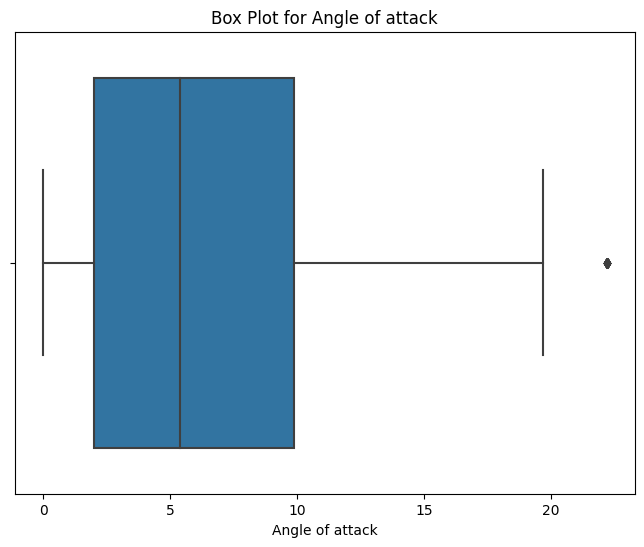

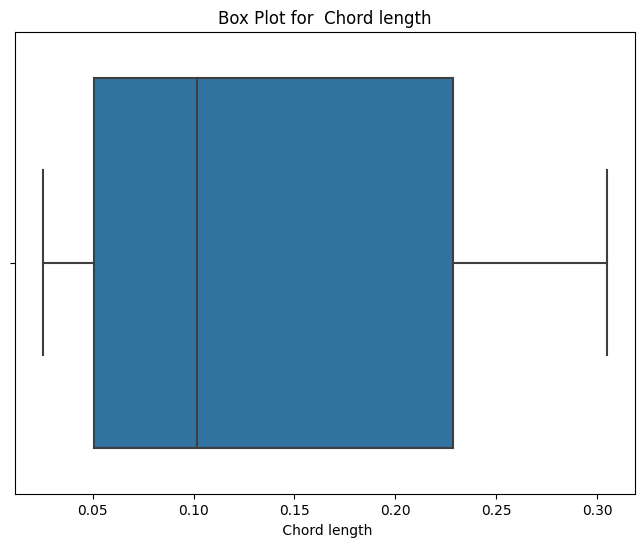

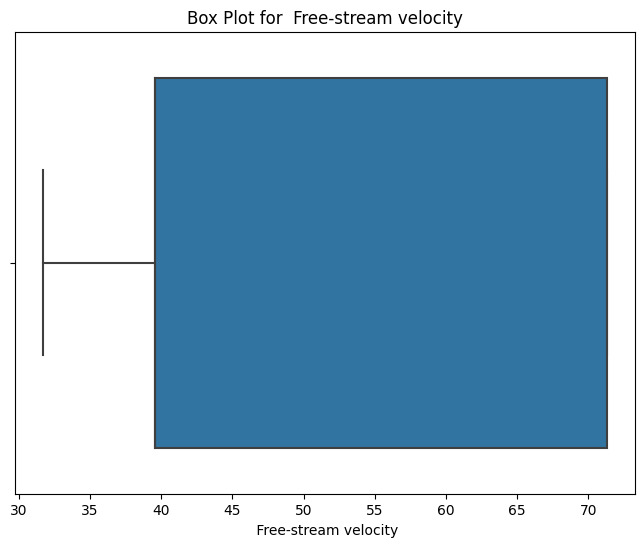

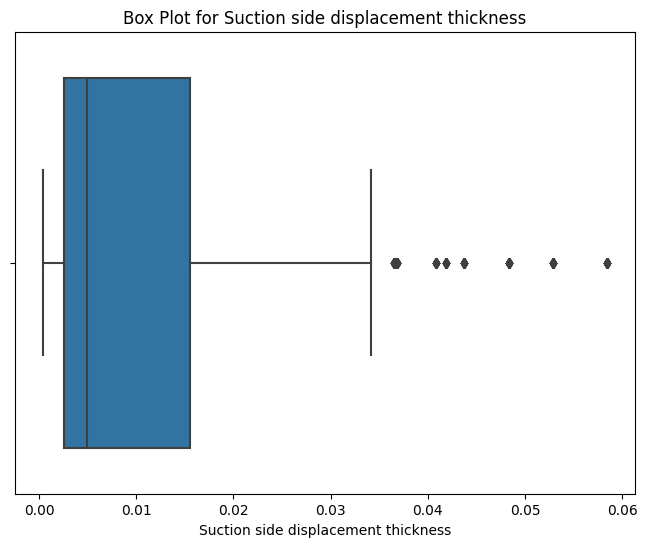

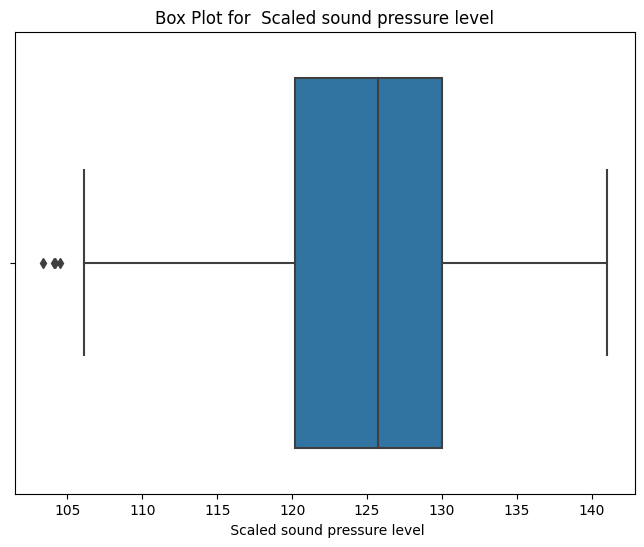

In [7]:
for column in column_headers:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    sns.boxplot(x=airfoil[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()
     # plotting the outliers for every column

In [8]:
import matplotlib.pyplot as plt

Q1 = airfoil.quantile(0.25)
Q3 = airfoil.quantile(0.75)
IQR = Q3 - Q1
outliers = ((airfoil < (Q1 - 1.5 * IQR)) | (airfoil > (Q3 + 1.5 * IQR))).any(axis=1)

df_no = airfoil[~outliers]
df_no
# remove the outliers using IQR methods

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1420,2500,12.3,0.1016,71.3,0.033779,121.318
1421,3150,12.3,0.1016,71.3,0.033779,120.798
1422,4000,12.3,0.1016,71.3,0.033779,118.018
1423,5000,12.3,0.1016,71.3,0.033779,116.108


In [9]:
airfoil2=df_no

In [10]:
airfoil2[airfoil2.duplicated()]

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level


In [11]:
X_reg = airfoil2.iloc[:, :-1] 

y_reg = airfoil2.iloc[:, -1] 


X_train0, X_test0, y_train0, y_test0 = train_test_split(X_reg, y_reg, random_state=42)
#the x is the features without the target as the y is the target only then we split the data into training and testing

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train0, y_train0)

# Make predictions
y_train_pred = model.predict(X_train0)
y_test_pred = model.predict(X_test0)

# Calculate RMSE and MAE
train_rmse = np.sqrt(mean_squared_error(y_train0, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test0, y_test_pred))

train_mae = mean_absolute_error(y_train0, y_train_pred)
test_mae = mean_absolute_error(y_test0, y_test_pred)


print("Test RMSE:", test_rmse)

#we used the linear regression model on the training

Test RMSE: 4.863021956541963


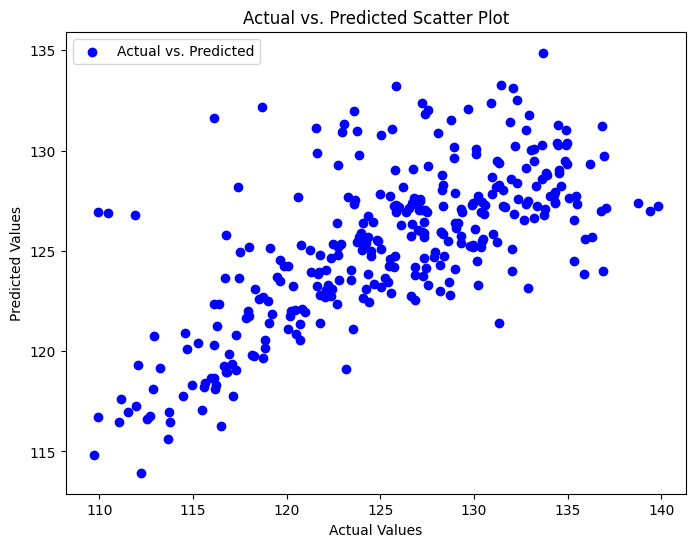

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_test_pred, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.legend(loc='upper left')
# scatter plot showing actual vs predicted

In [14]:

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train0, y_train0)

# Make predictions on the test data
y_pred = regressor.predict(X_test0)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test0, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.9016015411392395


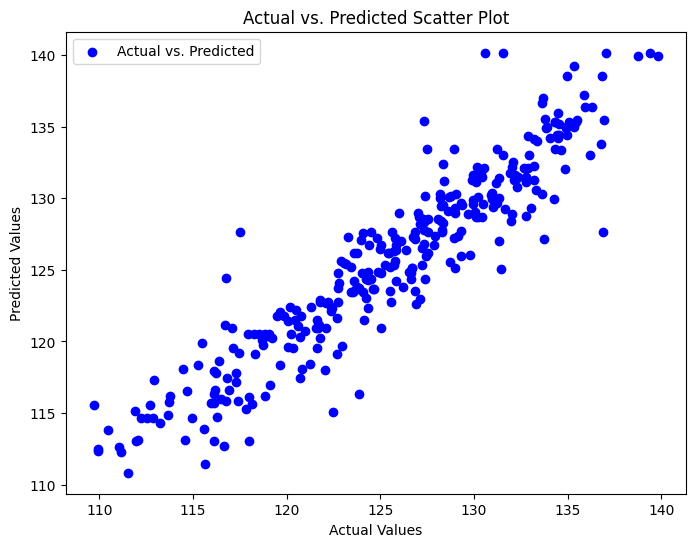

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_pred, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.legend(loc='upper left')
plt.show()
# scatter plot showing actual vs predicted

In [16]:
# Create a Decision Tree model
decision_tree = DecisionTreeRegressor(max_depth=200, min_samples_split= 4,random_state = 42)

# Fit the model to the training data
decision_tree.fit(X_train0, y_train0)

# Make predictions on the test data
y_pred10 = decision_tree.predict(X_test0)

mse = mean_squared_error(y_test0, y_pred10)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.878973070850916


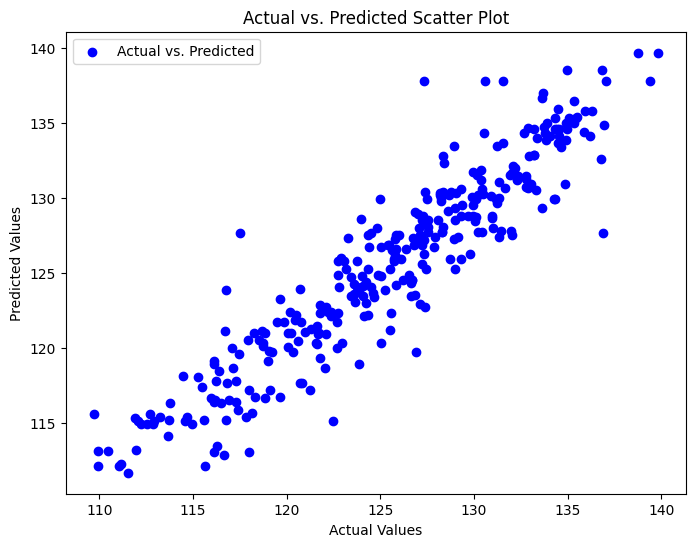

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_pred10, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.legend(loc='upper left')
plt.show()
# scatter plot showing actual vs predicted

In [18]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Fit the model to the training data
random_forest.fit(X_train0, y_train0)

# Make predictions on the test data
y_pred12 = random_forest.predict(X_test0)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test0, y_pred12)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.960701785706983


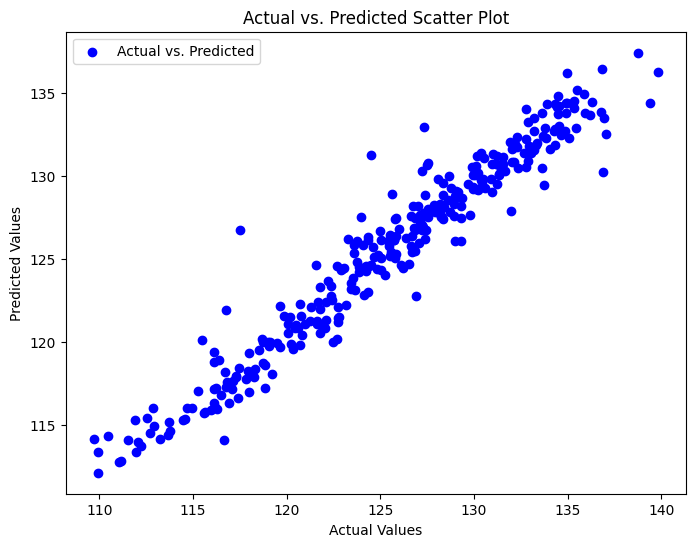

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test0, y_pred12, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot')
plt.legend(loc='upper left')
plt.show()
# scatter plot showing actual vs predicted

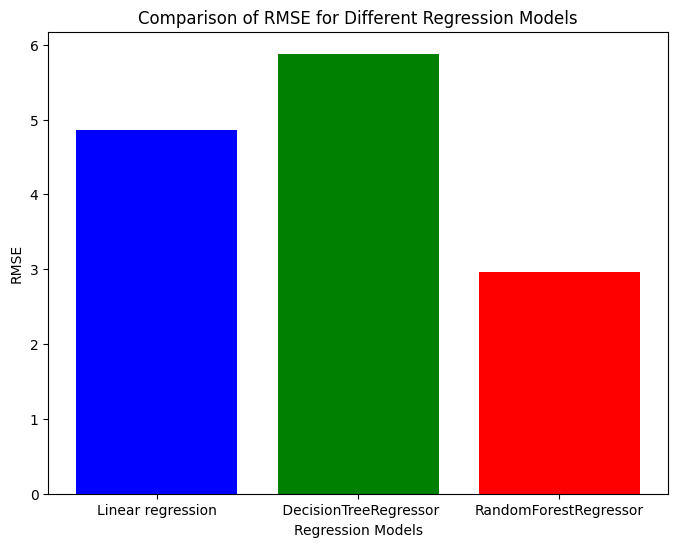

In [20]:
# RMSE values for three different regression models
rmse_values = [4.863021956541963, 5.878973070850916, 2.960701785706983]  # Replace with your actual RMSE values

# Model names or labels for the x-axis
model_names = ["Linear regression", " DecisionTreeRegressor", "RandomForestRegressor"]

# Create a bar chart to compare RMSE values
plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Regression Models')
plt.show()
